# Video Games Sales Analysis and Predictive Modeling

![img](https://cdn.wallpapersafari.com/87/43/siqdob.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


# LOAD DATASET

In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

## Removing duplicate and missing values.

In [3]:
df.dropna(inplace=True)
df.drop(columns="Rank",inplace=True)
df = df[df["Year"]<2017.0]
df

Name Platform    Year  \
0                                            Wii Sports      Wii  2006.0   
1                                     Super Mario Bros.      NES  1985.0   
2                                        Mario Kart Wii      Wii  2008.0   
3                                     Wii Sports Resort      Wii  2009.0   
4                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16594                     Men in Black II: Alien Escape       GC  2003.0   
16595  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16596                                        Know How 2       DS  2010.0   
16597                                  Spirits & Spells      GBA  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16287 rows x 10 columns]

<AxesSubplot:>

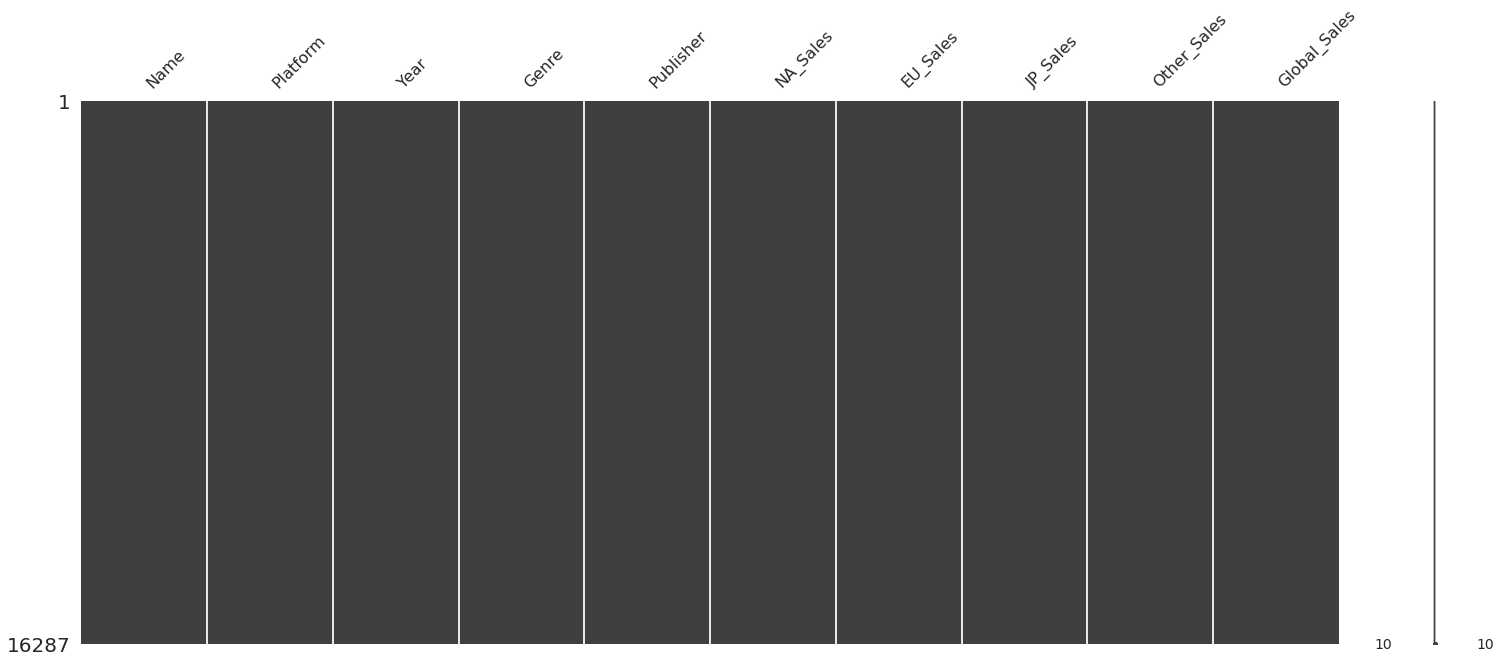

In [4]:
missingno.matrix(df)

In [5]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.loc[:,'Year'] = df.loc[:,'Year'].astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16287 non-null  object 
 1   Platform      16287 non-null  object 
 2   Year          16287 non-null  int64  
 3   Genre         16287 non-null  object 
 4   Publisher     16287 non-null  object 
 5   NA_Sales      16287 non-null  float64
 6   EU_Sales      16287 non-null  float64
 7   JP_Sales      16287 non-null  float64
 8   Other_Sales   16287 non-null  float64
 9   Global_Sales  16287 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


## Casted year column into int, furthermore we found that year ranges from 1980 to 2016.

In [9]:
years = df['Year'].unique()
years.sort()
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

# Dataset Profile Report

In [10]:
games_profile = ProfileReport(df, title='Video Games Sales Profiling')

In [11]:
games_profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Gaming Platforms

In [12]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# Correlations

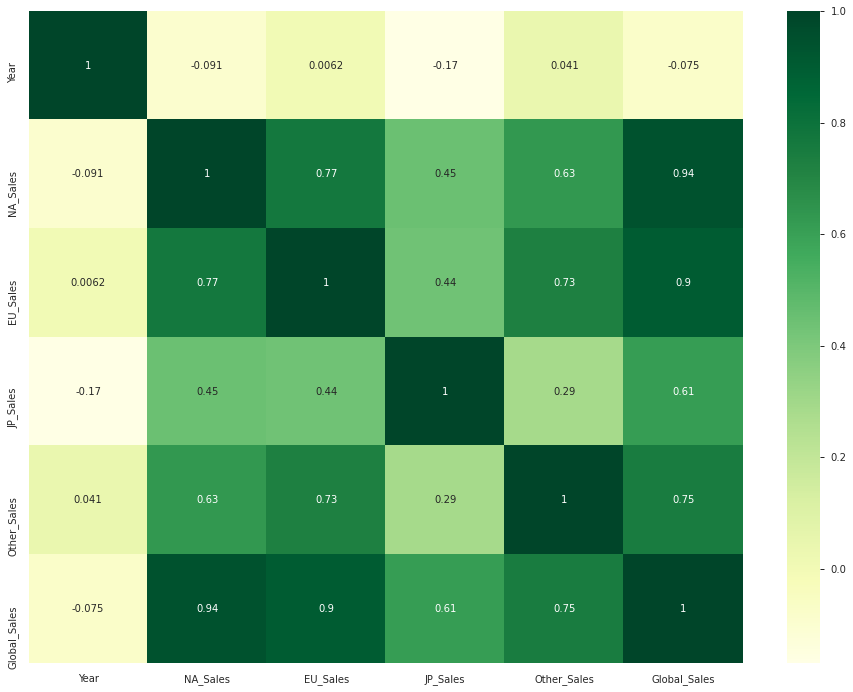

In [13]:
matrix = df.corr()
plt.figure(figsize=(16,12))
g=sns.heatmap(matrix,annot=True,cmap="YlGn")

## Pairplot

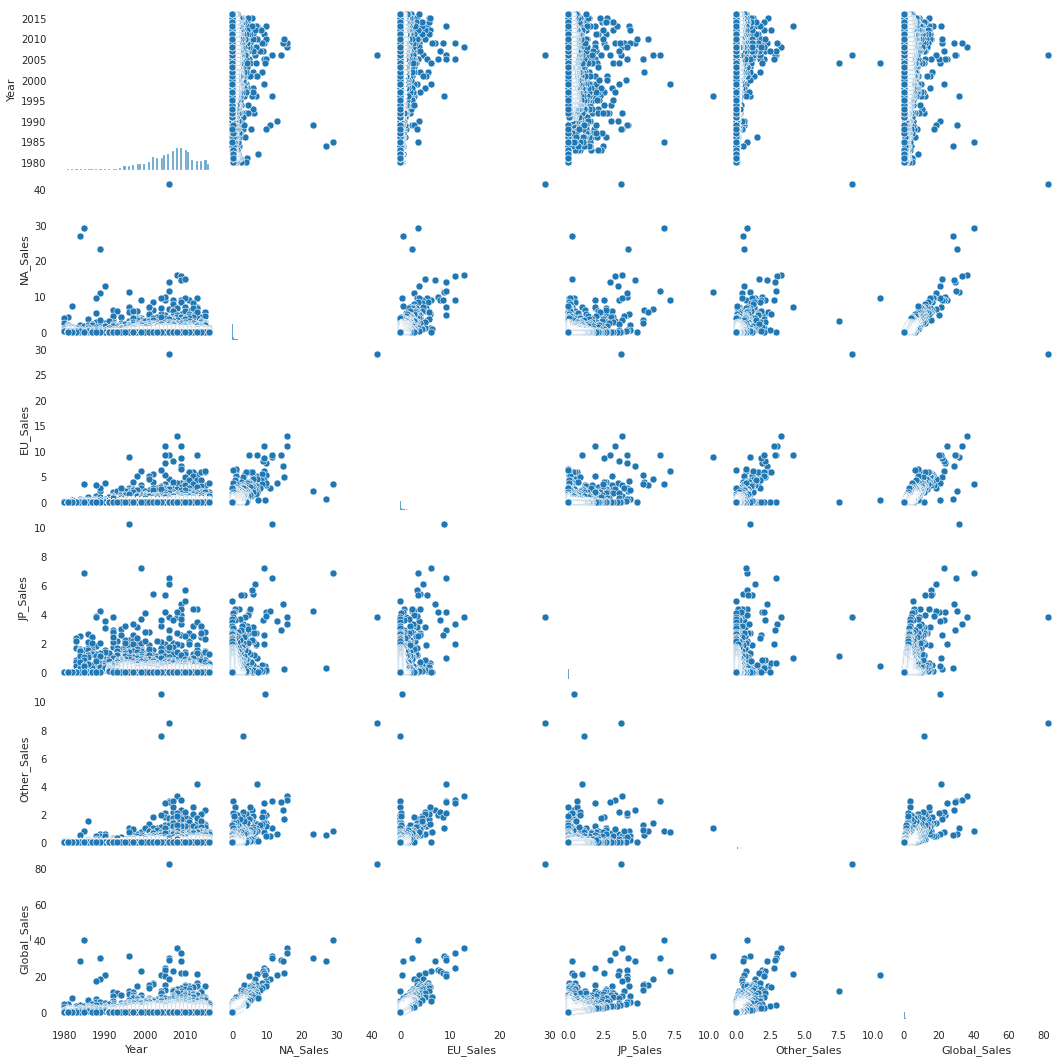

In [14]:
sns.pairplot(df)

## Relationship between North America Sales and Global Sales

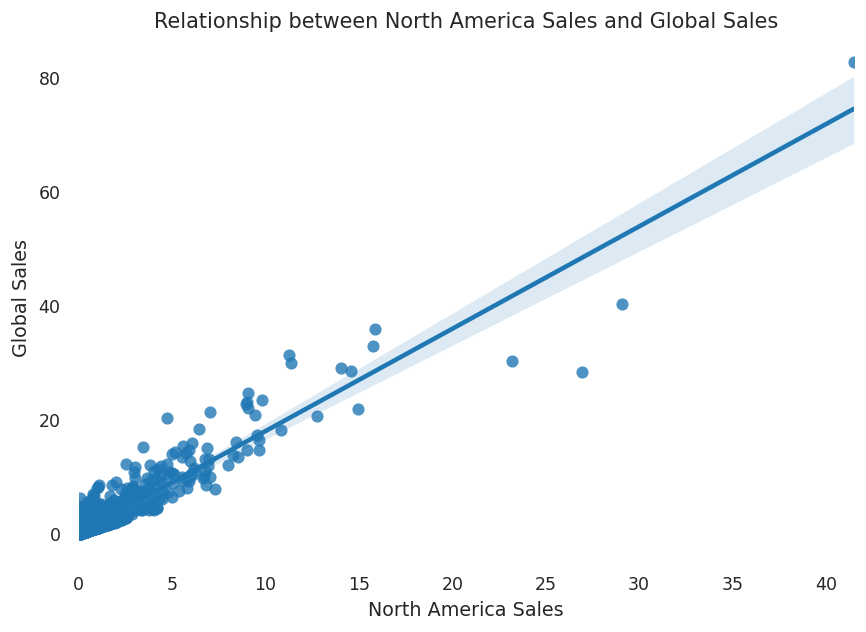

In [15]:
plt.figure(dpi=125)
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.title('Relationship between North America Sales and Global Sales')
plt.show()

## Relationship between Europe Sales and Global Sales

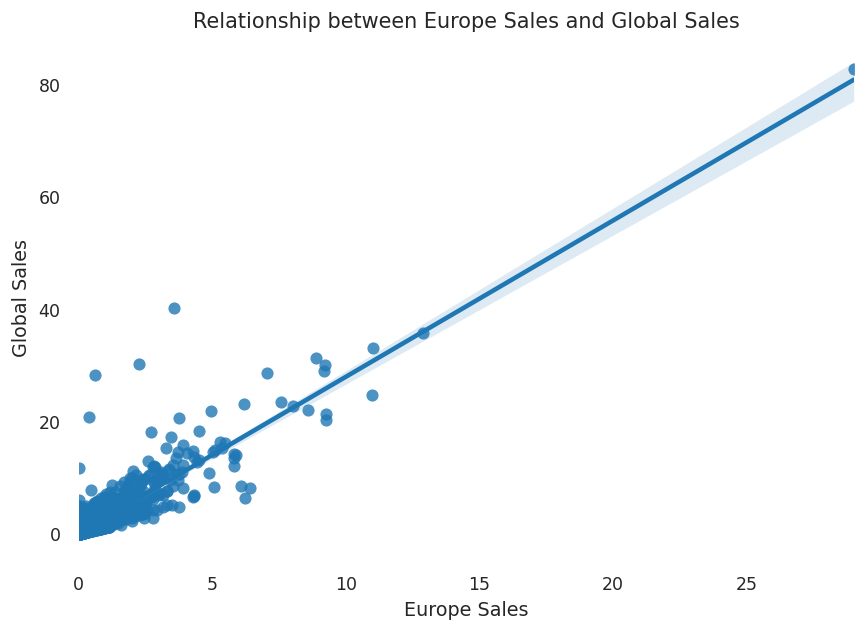

In [16]:
plt.figure(dpi=125)
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Europe Sales')
plt.ylabel('Global Sales')
plt.title('Relationship between Europe Sales and Global Sales')
plt.show()

## Relationship between Japan Sales and Global Sales

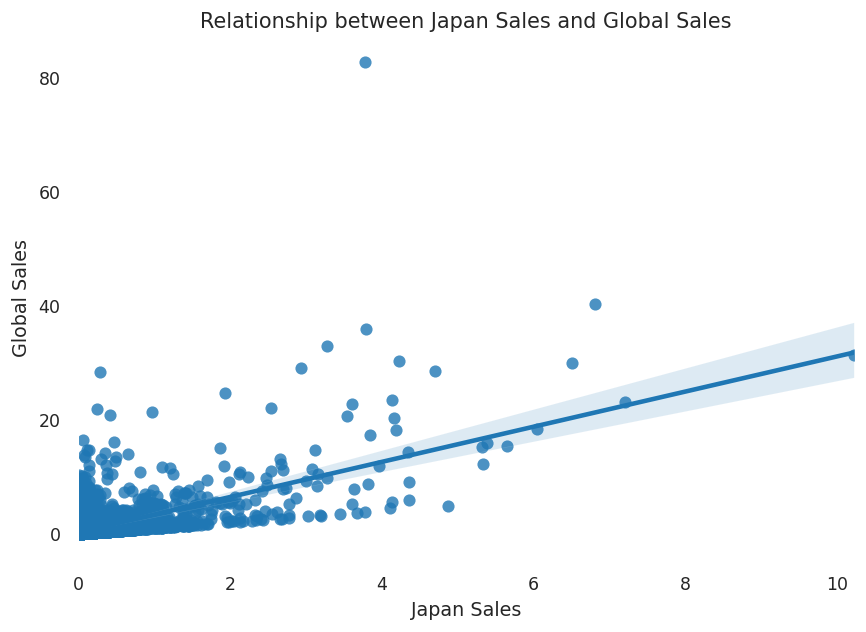

In [17]:
plt.figure(dpi=125)
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Japan Sales')
plt.ylabel('Global Sales')
plt.title('Relationship between Japan Sales and Global Sales')
plt.show()

## Best Publisher in Top 100 Video Games

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


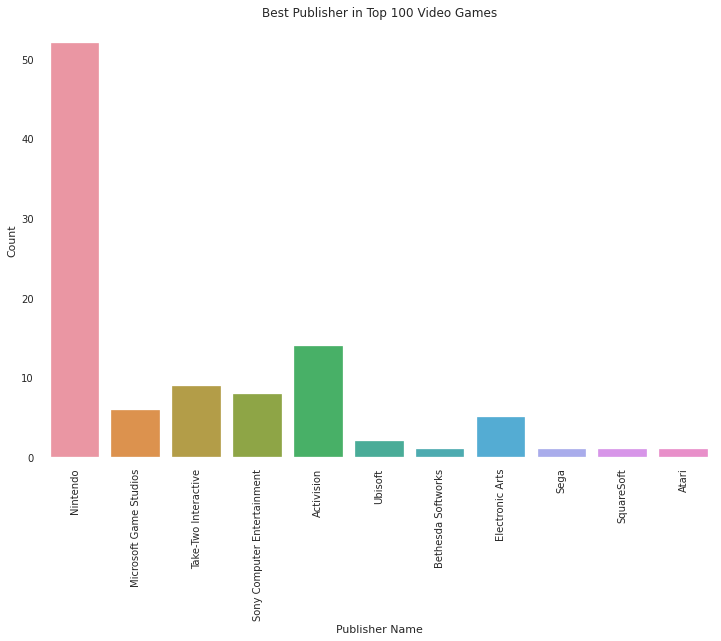

In [18]:
fig ,ax = plt.subplots(figsize= (12,8))
sns.countplot(df.head(100)['Publisher'], ax=ax)
plt.xlabel('Publisher Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Best Publisher in Top 100 Video Games')
plt.show()

## Sales Distribution

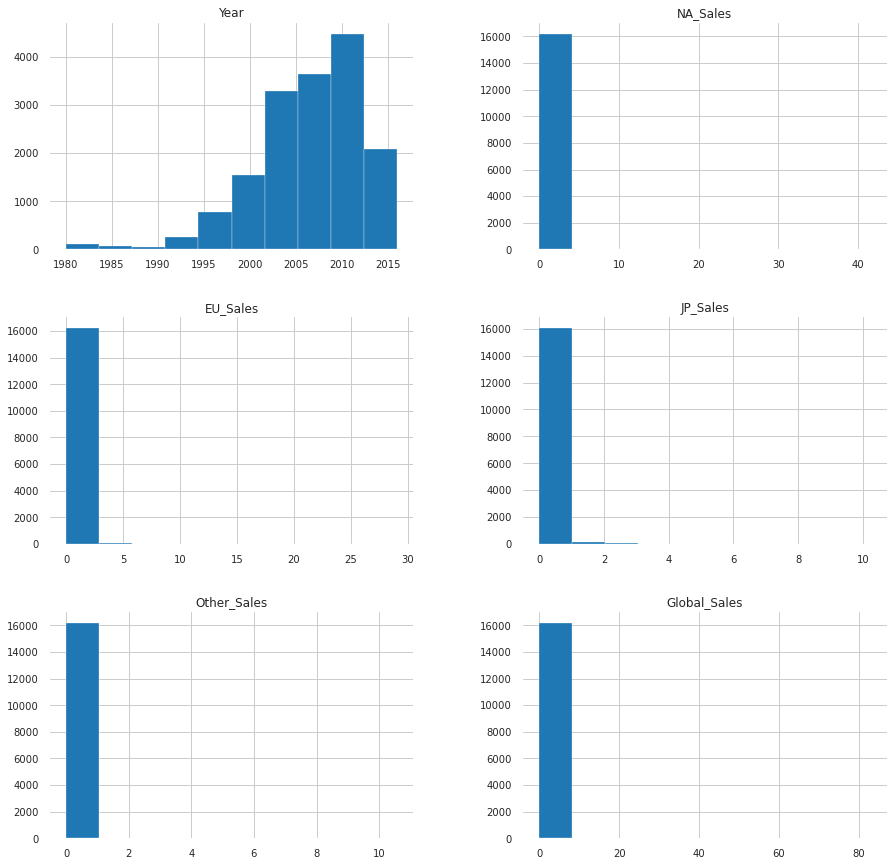

(16287, 10)
Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [19]:
df.hist(figsize=(15,15))
plt.show()
print(df.shape)
print(df.columns)

## Sales by Year

In [20]:
df_by_year = df.groupby(by  = 'Year').sum()
df_by_year

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
1980     10.59      0.67      0.00         0.12         11.38
1981     33.40      1.96      0.00         0.32         35.77
1982     26.92      1.65      0.00         0.31         28.86
1983      7.76      0.80      8.10         0.14         16.79
1984     33.28      2.10     14.27         0.70         50.36
1985     33.73      4.74     14.56         0.92         53.94
1986     12.50      2.84     19.81         1.93         37.07
1987      8.46      1.41     11.63         0.20         21.74
1988     23.87      6.59     15.76         0.99         47.22
1989     45.15      8.44     18.36         1.50         73.45
1990     25.46      7.63     14.88         1.40         49.39
1991     12.76      3.95     14.78         0.74         32.23
1992     33.87     11.71     28.91         1.65         76.16
1993     15.12      4.65     25.33         0.89         45.98
1994     28.15     14.88     33.99         2.20         79.17
1995     24.82     14.90     45.75         2.64         88.11
1996     86.76     47.26     57.44         7.69        199.15
1997     94.75     48.32     48.87         9.13        200.98
1998    128.36     66.90     50.04        11.03        256.47
1999    126.06     62.67     52.34        10.05        251.27
2000     94.49     52.75     42.77        11.62        201.56
2001    173.98     94.89     39.86        22.76        331.47
2002    216.19    109.74     41.76        27.28        395.52
2003    193.59    103.81     34.20        26.01        357.85
2004    218.80    105.92     41.65        47.24        414.01
2005    241.58    121.56     54.28        40.55        458.51
2006    263.12    129.24     73.73        54.43        521.04
2007    311.18    160.18     60.29        77.58        609.92
2008    351.44    184.40     60.26        82.39        678.90
2009    338.85    191.59     61.89        74.77        667.30
2010    304.24    176.57     59.49        59.90        600.29
2011    241.00    167.31     53.04        54.39        515.80
2012    154.93    118.76     51.74        37.82        363.49
2013    154.77    125.80     47.59        39.82        368.11
2014    131.97    125.63     39.46        40.02        337.03
2015    102.82     97.71     33.72        30.01        264.44
2016     22.66     26.76     13.67         7.75         70.90

In [21]:
df_by_year=df_by_year.apply(lambda x : x.astype("int"))

In [22]:
df_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1980 to 2016
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NA_Sales      37 non-null     int64
 1   EU_Sales      37 non-null     int64
 2   JP_Sales      37 non-null     int64
 3   Other_Sales   37 non-null     int64
 4   Global_Sales  37 non-null     int64
dtypes: int64(5)
memory usage: 1.7 KB


# Sales Analysis

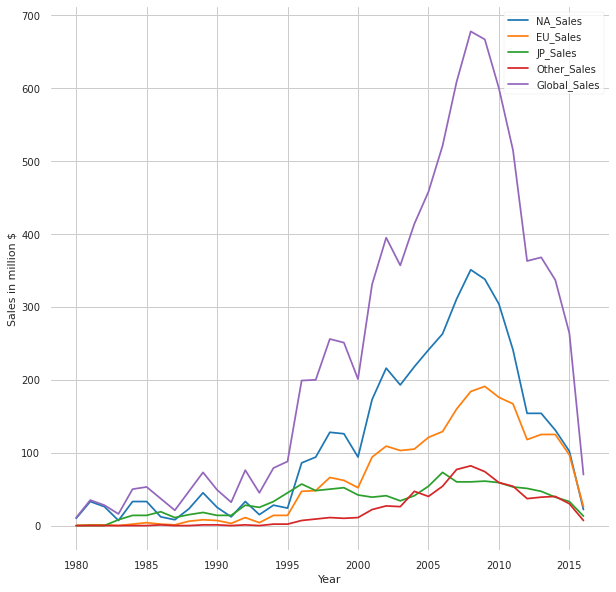

In [23]:
df_by_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales in million $");

<AxesSubplot:ylabel='Density'>

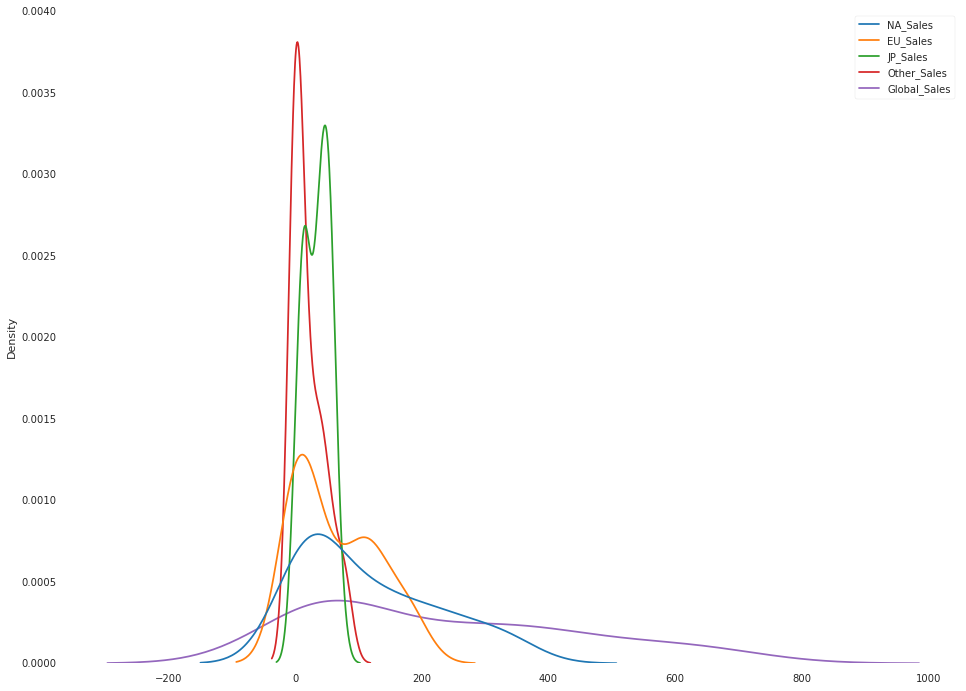

In [24]:
fig ,ax = plt.subplots(figsize= (16,12))
sns.kdeplot(data=df_by_year, ax=ax)

In [25]:
df_by_year.reset_index(inplace=True)
df_by_year

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0   1980        10         0         0            0            11
1   1981        33         1         0            0            35
2   1982        26         1         0            0            28
3   1983         7         0         8            0            16
4   1984        33         2        14            0            50
5   1985        33         4        14            0            53
6   1986        12         2        19            1            37
7   1987         8         1        11            0            21
8   1988        23         6        15            0            47
9   1989        45         8        18            1            73
10  1990        25         7        14            1            49
11  1991        12         3        14            0            32
12  1992        33        11        28            1            76
13  1993        15         4        25            0            45
14  1994        28        14        33            2            79
15  1995        24        14        45            2            88
16  1996        86        47        57            7           199
17  1997        94        48        48            9           200
18  1998       128        66        50           11           256
19  1999       126        62        52           10           251
20  2000        94        52        42           11           201
21  2001       173        94        39           22           331
22  2002       216       109        41           27           395
23  2003       193       103        34           26           357
24  2004       218       105        41           47           414
25  2005       241       121        54           40           458
26  2006       263       129        73           54           521
27  2007       311       160        60           77           609
28  2008       351       184        60           82           678
29  2009       338       191        61           74           667
30  2010       304       176        59           59           600
31  2011       241       167        53           54           515
32  2012       154       118        51           37           363
33  2013       154       125        47           39           368
34  2014       131       125        39           40           337
35  2015       102        97        33           30           264
36  2016        22        26        13            7            70

[Text(0, 0, '1980'),
 Text(1, 0, '1981'),
 Text(2, 0, '1982'),
 Text(3, 0, '1983'),
 Text(4, 0, '1984'),
 Text(5, 0, '1985'),
 Text(6, 0, '1986'),
 Text(7, 0, '1987'),
 Text(8, 0, '1988'),
 Text(9, 0, '1989'),
 Text(10, 0, '1990'),
 Text(11, 0, '1991'),
 Text(12, 0, '1992'),
 Text(13, 0, '1993'),
 Text(14, 0, '1994'),
 Text(15, 0, '1995'),
 Text(16, 0, '1996'),
 Text(17, 0, '1997'),
 Text(18, 0, '1998'),
 Text(19, 0, '1999'),
 Text(20, 0, '2000'),
 Text(21, 0, '2001'),
 Text(22, 0, '2002'),
 Text(23, 0, '2003'),
 Text(24, 0, '2004'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '2008'),
 Text(29, 0, '2009'),
 Text(30, 0, '2010'),
 Text(31, 0, '2011'),
 Text(32, 0, '2012'),
 Text(33, 0, '2013'),
 Text(34, 0, '2014'),
 Text(35, 0, '2015'),
 Text(36, 0, '2016')]

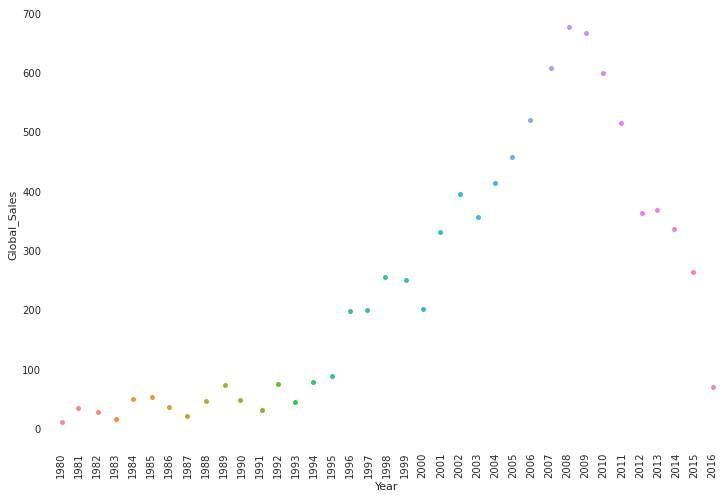

In [26]:
fig ,ax = plt.subplots(figsize= (12,8))
p = sns.stripplot(x=df_by_year['Year'],
              y=df_by_year['Global_Sales'], ax=ax)
p.set_xticklabels(labels = df_by_year['Year'],rotation=90)

[]

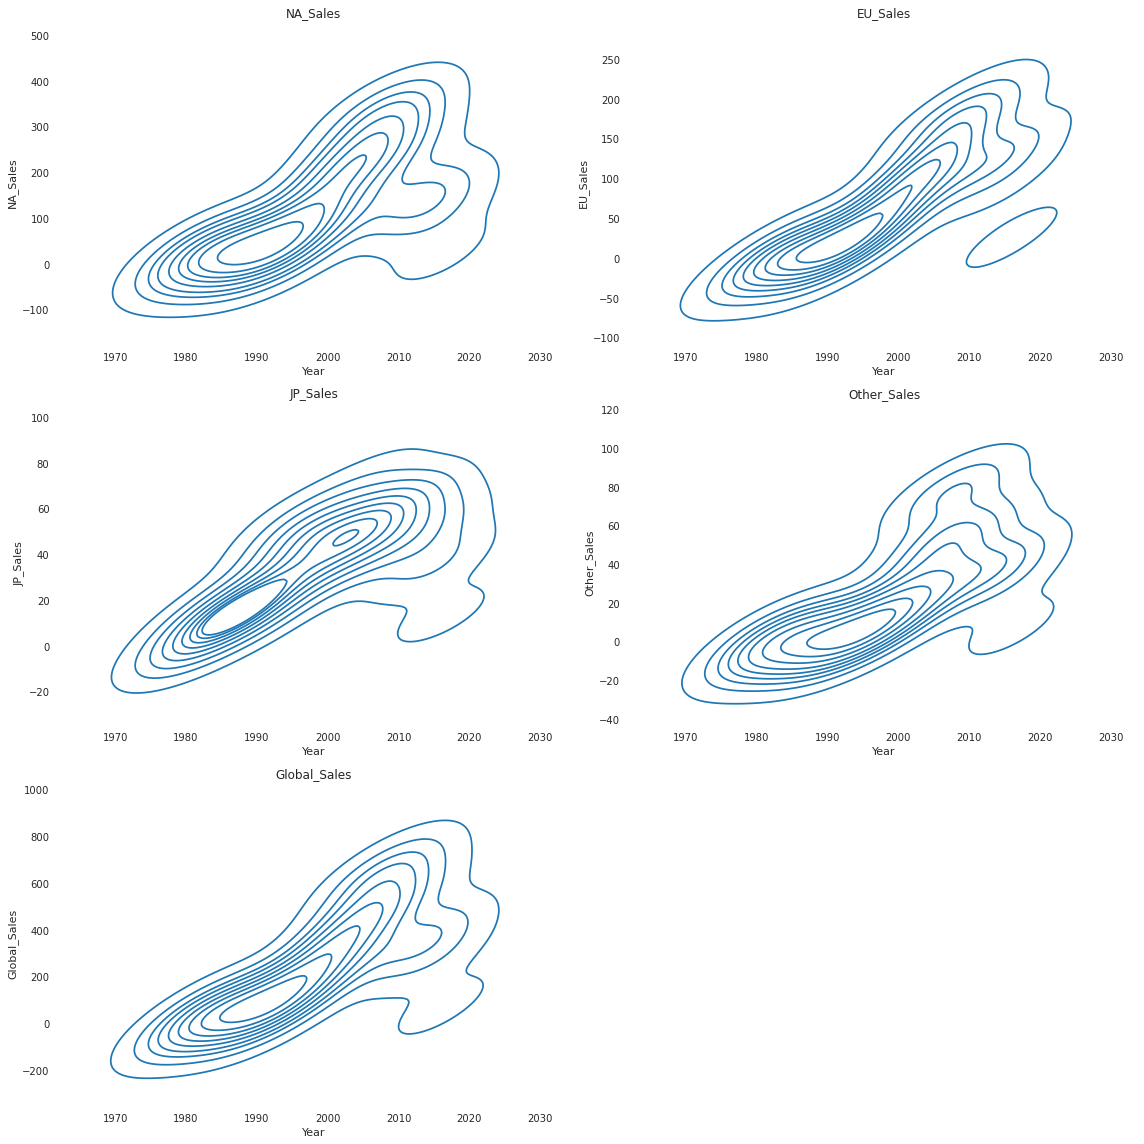

In [27]:
fig ,axs = plt.subplots(3,2 ,figsize= (16,16))
fig.set_facecolor("white")
fig.delaxes(axs[2,1])

def jointplot(cplot,data,region):
    x = cplot//2
    y = cplot%2
    sns.kdeplot(ax=axs[x,y], data=data, x=df_by_year['Year'], y=region)
    axs[x,y].set_title(region)
    
cplot=0
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i in region:
    jointplot(cplot, df_by_year, i)
    cplot+=1
    
fig.tight_layout()
plt.plot()

# Predictive Modeling

In [28]:
X = df[['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

## Multiple Linear Regression (scikit-learn)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
R_squared = reg.score(X_test, y_test)
R_squared

0.9999860496809578

## R2 Score : 0.9999860496809578

In [30]:
y_pred

array([0.02028833, 0.01029648, 0.15028086, ..., 0.5202426 , 0.42027197,
       0.19027382])

In [31]:
y_pred_train

array([0.08027871, 2.78997154, 0.02028186, ..., 0.06028388, 4.53971694,
       0.0402882 ])

## kNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

In [33]:
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9538189722969099


## R2 Score : 0.9538189722969099

![go](https://www.itl.cat/pngfile/big/297-2974093_game-over-video-games-retro-games-distortion-wallpapers.jpg)